# 1. Business Understanding

### Introduction to PL Badges Image Recognition Project

Hey folks! Welcome to the PL Badges Image Recognition project, where we're embarking on a journey into the realm of machine learning with Python. We're on a mission to teach our computer to recognize and sort out the badges of the Premier League football clubs for the 2021/2022 season.

But here's the cool part – we're not just winging it. We've got a plan, and we're following something called the CRISP-DM methodology. It's like our roadmap for making this project a success. CRISP-DM helps us organize our steps and ensures we cover all the bases as we dive into the exciting world of machine learning.

So, buckle up for a fantastic ride as we use Python and CRISP-DM to make our computer super savvy at recognizing the unique badges of our favorite football teams. Get ready for some tech magic and football fun! 🚀⚽

Dataset source: https://www.kaggle.com/datasets/alexteboul/english-premier-league-logo-detection-20k-images/data

#### 1.1 Import the necessary libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image data augmentation
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import os, os.path  # For handling file paths and directories
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
import matplotlib.image as mpimg  # For reading and displaying images
import tensorflow as tf  # TensorFlow deep learning framework
from tensorflow.keras import datasets, layers, models  # Components for building neural networks
import numpy as np  # For numerical operations
from PIL import Image  # Python Imaging Library for image processing
import random  # For generating random numbers
from tensorflow.keras.applications.xception import Xception  # Pre-trained Xception model
from tensorflow.keras import Sequential  # Sequential model for stacking layers
from tensorflow.keras.layers import Dense, Flatten, Dropout  # Different layer types for neural networks
from tensorflow.keras.callbacks import EarlyStopping  # Callback for early stopping during model training
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn import preprocessing  # For preprocessing and scaling data
from keras.optimizers import Adam  # Importing the Adam optimizer from Keras
from tensorflow.keras.models import Sequential, save_model, load_model  # For saving the model

# 2. Data Understanding

#### 2.1 Load images and associate labels

In [2]:
import os
import numpy as np
import tensorflow as tf

# Define the path to the images
path_images = "./EPL-badges"

# Empty lists for images and labels
images = []
labels = []

# For each folder (club) in the main directory
for club_folder in os.listdir(path_images):
    club_path = os.path.join(path_images, club_folder)
    
    # Skip if it's not a directory
    if not os.path.isdir(club_path):
        continue
    
    # For each photo in the club folder:
    image_files = os.listdir(club_path)
    # Shuffle the image files for randomness
    np.random.shuffle(image_files)
    
    # Calculate the number of images to use (50%)
    num_images_to_use = int(0.5 * len(image_files))
    
    # Iterate over the selected images
    for image in image_files[:num_images_to_use]:
        # Add a label (club name)
        labels.append(club_folder)
        
        # Load the image and convert it to a preprocessed image with chosen pixels
        image_path = os.path.join(club_path, image)
        imageload = tf.keras.preprocessing.image.load_img(image_path, grayscale=False, color_mode="rgb", target_size=(256, 256))
        images.append(np.asarray(imageload))

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(images)
print(labels)


[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[160 130  62]
   [160 130  62]
   [154 128  58]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

#### 2.2 Encode class names and labels

In [3]:
# Unique class names
unique_class_names = np.unique(labels)

# Initialize a LabelEncoder for class names
class_name_encoder = preprocessing.LabelEncoder()

# Encode class names
encoded_classes = class_name_encoder.fit_transform(unique_class_names)

# Initialize a LabelEncoder for labels
label_encoder = preprocessing.LabelEncoder()

# Encode labels
labels_encoded = label_encoder.fit_transform(labels)

print("Unique Class Names:", unique_class_names)
print("Encoded Classes:", encoded_classes)
print("Encoded Labels:", labels_encoded)

Unique Class Names: ['arsenal' 'aston-villa' 'brentford' 'brighton' 'burnley' 'chelsea'
 'crystal-palace' 'everton' 'leeds' 'leicester-city' 'liverpool'
 'manchester-city' 'manchester-united' 'newcastle' 'norwich' 'southampton'
 'tottenham' 'watford' 'west-ham' 'wolves']
Encoded Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Encoded Labels: [ 0  0  0 ... 19 19 19]


We converted the club names into integers to facilitate numerical representation, enabling a more efficient and machine-readable format for further data processing and analysis.

#### 2.3 Class analysis

In [4]:
# Count the occurrences of each label
label_counts = [np.count_nonzero(labels_encoded == i) for i in range(len(unique_class_names))]

# Create a DataFrame
df = pd.DataFrame({'Badges': unique_class_names, 'Count': label_counts})

print(df)

               Badges  Count
0             arsenal    500
1         aston-villa    500
2           brentford    500
3            brighton    500
4             burnley    500
5             chelsea    500
6      crystal-palace    500
7             everton    500
8               leeds    500
9      leicester-city    500
10          liverpool    500
11    manchester-city    500
12  manchester-united    500
13          newcastle    500
14            norwich    500
15        southampton    500
16          tottenham    500
17            watford    500
18           west-ham    500
19             wolves    500


This confirms our dataset comprising 20 clubs, each with 1000 pictures.

#### 2.4 Analysis by plot

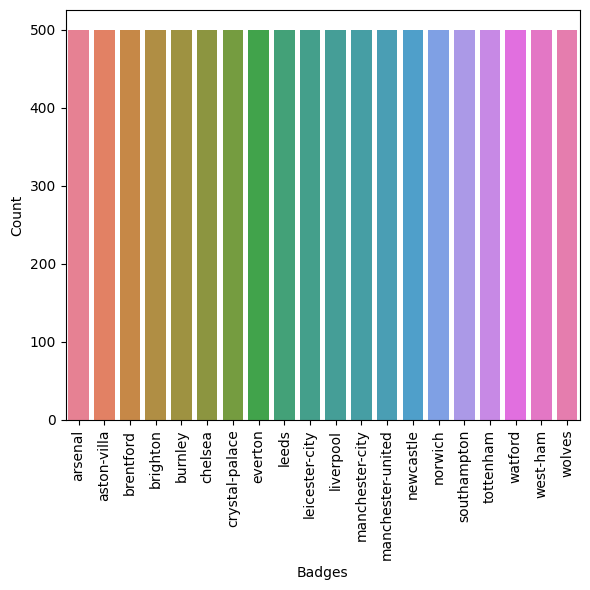

In [5]:
# Specify the size of the plot
plt.figure(figsize=(6, 6))

# Choose the plot type (in this case, a seaborn bar plot)
sns.barplot(data=df, x="Badges", y="Count", hue="Badges")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()

Let's create a visualization for an overview. While it may not provide significant insights for this dataset due to its balanced nature, it could prove meaningful for future analyses with more diverse datasets.

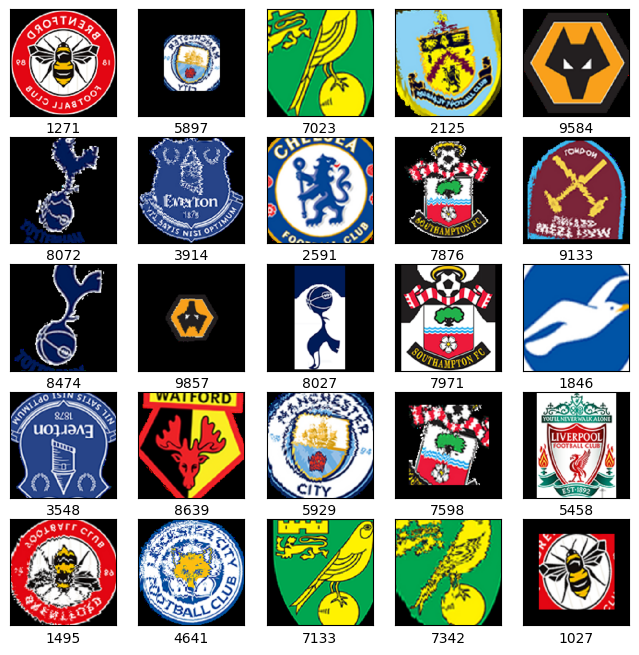

In [6]:
# Specify plot size
plt.figure(figsize=(8, 8))

# Display random 25 photos
for i in range(25):
    # Create a 5x5 subplot
    plt.subplot(5, 5, i + 1)
    # Choose a random integer
    random_int = random.randint(0, len(images))
    # Show an image using the random number
    plt.imshow(images[random_int])
    # No scale on the x-axis
    plt.xticks([])
    # No scale on the y-axis
    plt.yticks([])
    # Display the corresponding label
    plt.xlabel(random_int)

Let's create a visualization for an overview. While it may not provide significant insights for this dataset due to its balanced nature, it could prove meaningful for future analyses with more diverse datasets.

# 3. Data Preparation

#### 3.1 Splitting train and test

In [7]:
# Train test splitten
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

We choose for a 80/20 split and a random state to ensure consistent randomization for reproducibility. 

#### 3.2 Confirming the split

In [8]:
# Training set
print("Training set:")
print("Images:", len(train_images), "Labels:", len(train_labels))

# Test set
print("Test set:")
print("Images:", len(test_images), "Labels:", len(test_labels))

# Space
print("")

# Shapes of training set
print("Shapes of training set:")
print("Images:", train_images.shape, "Labels:", train_labels.shape)

# Shapes of test set
print("Shapes of test set:")
print("Images:", test_images.shape, "Labels:", test_labels.shape)


Training set:
Images: 8000 Labels: 8000
Test set:
Images: 2000 Labels: 2000

Shapes of training set:
Images: (8000, 256, 256, 3) Labels: (8000,)
Shapes of test set:
Images: (2000, 256, 256, 3) Labels: (2000,)


Checking if the split has been succesful before we start modelling. 

#### 3.3 Confirming the image

Picture ID: 1695
Label Number: 6
Label Name: crystal-palace


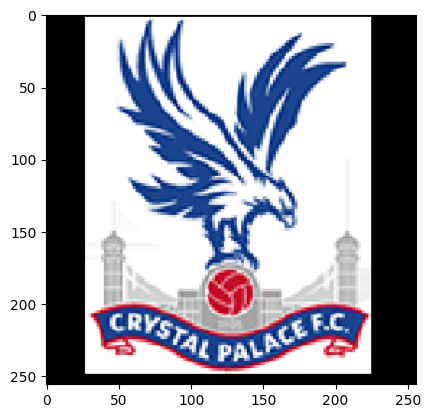

In [9]:
# Generate a random number
random_number = random.randint(0, len(train_images))

# Get the label and its corresponding number
label_number = train_labels[random_number]
label_name = unique_class_names[label_number]

# Print the label information
print("Picture ID:", random_number)
print("Label Number:", label_number)
print("Label Name:", label_name)

# Display the image based on the random number
plt.imshow(train_images[random_number])

To confirm the success of the split, we can check the distribution of club pictures before and after the split. Before the split, the club above was in a different split. This indicates that the randomization has worked successfully, ensuring a representative distribution of clubs in both the training and testing sets.

#### 3.4 Normalise the data

In [10]:
# Normalise the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check the minimum and maximum values after normalization
print("Min Value after Normalization:", np.min(train_images))
print("Max Value after Normalization:", np.max(train_images))

Min Value after Normalization: 0.0
Max Value after Normalization: 1.0


We've chosen to divide by 255, as it represents the highest possible RGB value, effectively scaling the numbers between 0 and 1. This normalization ensures that the pixel values are within a standardized range for efficient model training and improved convergence.

#### 3.5 Copy the data

Create copies of the original data so you can predict later with the non-normalized images

In [11]:
# Create a copy
test_images_org = test_images.copy()

# 4. Modelling

#### 4.1 Building a model

In [12]:
# Build the model with input shape adjusted for higher-resolution images
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation="relu", input_shape=(256, 256, 3)))  # Adjusted input shape
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(20, activation="softmax"))

# Display the summary
model.summary()

# Compile the model
model.compile(
    optimizer=Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model using the higher-resolution images
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 256)     590080    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 256)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 984064)            0         
                                                                 
 dense (Dense)               (None, 20)                1

We opted for the convolutional layer in our model to effectively capture patterns and features in images, especially those associated with badges, and to recognize specific objects such as birds, hammers, cannons, or lions. The convolutional layer utilizes filters with a small receptive field, enabling it to learn locally relevant patterns. This capability allows the model to comprehend complex visual information, crucial for distinguishing unique features of various objects within the images. It plays a key role in aiding the model to make accurate predictions regarding the presence of specific items belonging to the given classes, enhancing its ability to recognize diverse objects in the dataset.

The dense layer has 20 units, which matches the number of classes in the classification task. The softmax activation function is used to convert the output into probabilities, indicating the likelihood of the input image belonging to each class.

#### 4.2 Accuracy (validation)

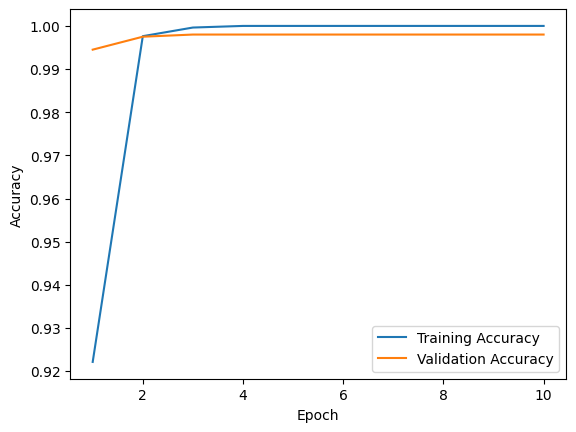

Final Validation Accuracy: 0.9980 - or 99.8000%.


In [13]:
# Define accuracy and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
final_val_accuracy = val_accuracy[-1]  # Extract the final validation accuracy

# Set the epochs
epochs = range(1, len(accuracy) + 1)

# Plot the two lines
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

# Add labels to the axes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Show the legend
plt.legend(loc='lower right')

# Display the plot
plt.show()

# Print the final validation accuracy below the plot
print(f'Final Validation Accuracy: {final_val_accuracy:.4f} - or {final_val_accuracy * 100:.4f}%.')


After a certain number of epochs, the model may have learned all it can from the training data, and further training does not lead to significant improvements. This is common when the model has already captured the underlying patterns in the data. So 10 epochs were an overkill. 

#### 4.3 Confusion Matrix

63/63 [==============================] - 150s 2s/step


<Axes: >

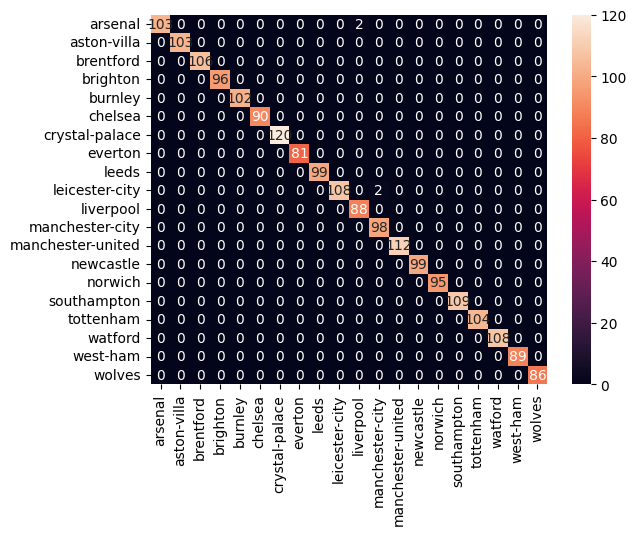

In [14]:
# Import the library
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create an empty list for predictions
Y_predict = []

# Create a 2D array with 10 values per class
predict = model.predict([test_images])

# Add the predicted value for each class to the empty list
for i in range(len(predict)):
    # Convert to argmax or only get the max value
    Y_predict.append(predict[i].argmax())

# Define the confusion matrix
cm = confusion_matrix(test_labels, Y_predict)

# Display the confusion matrix
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=unique_class_names,  # Column names on the x-axis
            yticklabels=unique_class_names)  # Row names on the y-axis



The confusion matrix reveals that errors are primarily occurring for two clubs, Arsenal and Liverpool, which have predominantly white and red logos. This could be due to color sensitivity or similar visual features.

#### 4.4 Predicting the images

63/63 [==============================] - 146s 2s/step
(2000, 20)
1/1 [==============================] - 0s 93ms/step


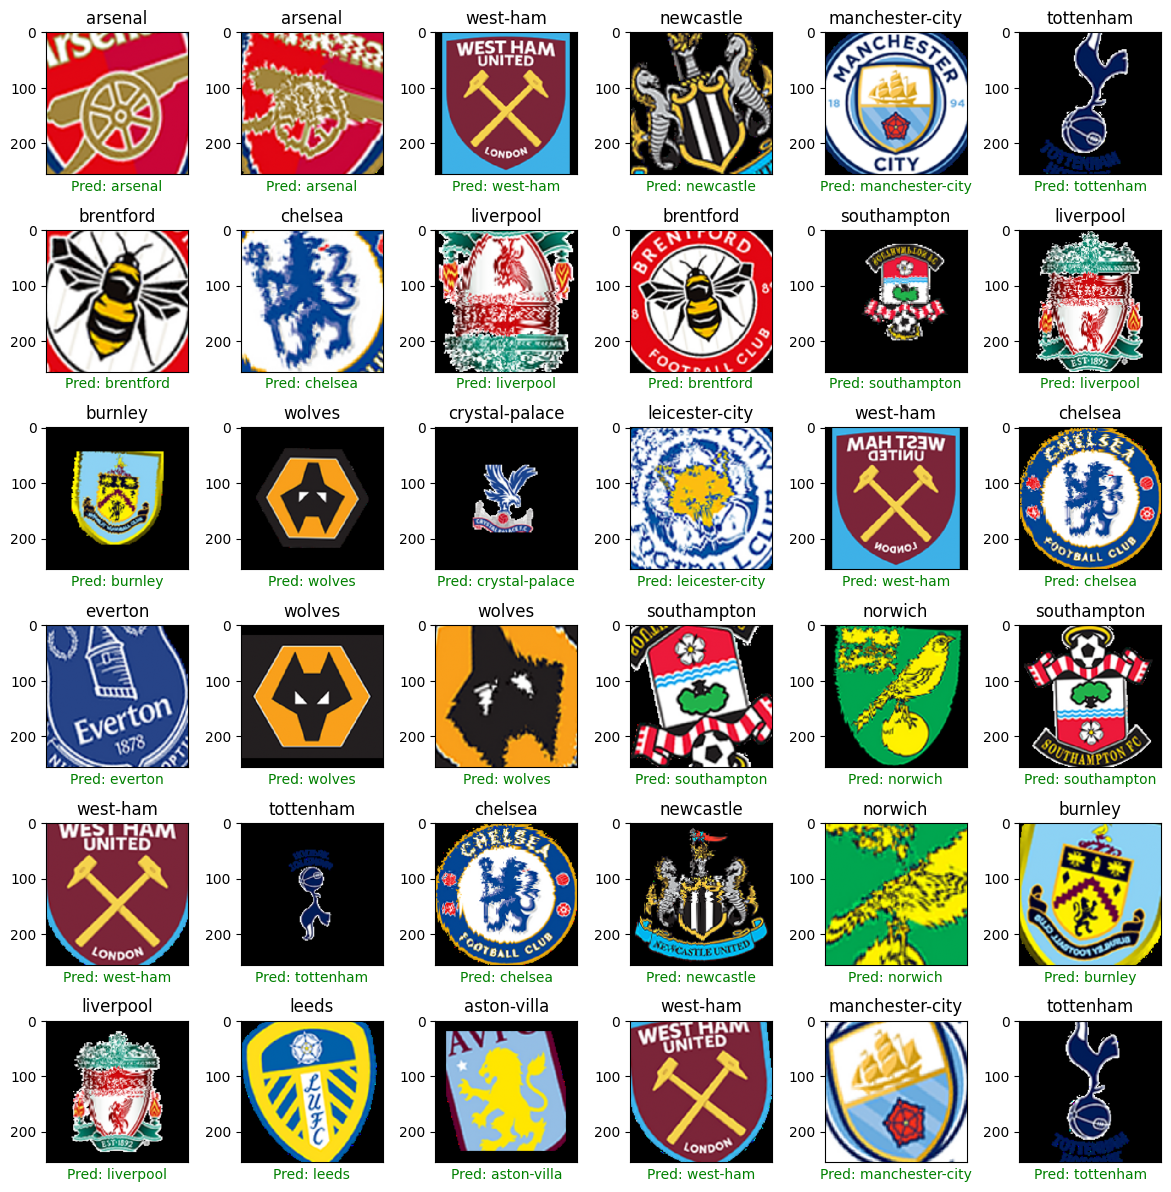

Accuracy: 100.00%


In [16]:
# Predict the first 36 images
predict = model.predict(test_images)

# Print the shape to verify
print(predict.shape)

# Initialize a count to store the model's accuracy
correct_predictions = 0

plt.figure(figsize=(12, 12))

# Loop to display 36 random images along with their predictions
for i in range(36):
    plt.subplot(6, 6, i + 1)
    
    # Disable x-axis scale
    plt.xticks([])
    # Disable y-axis scale
    plt.yticks()

    # Generate a random index
    number = random.randint(0, 2000)

    # Original images are needed because the rest are in a normalized vector
    prediction = model.predict(test_images[number].reshape(1, 256, 256, 3))
    prediction_name = unique_class_names[np.argmax(prediction)]
    actual_name = unique_class_names[test_labels[number]]

    # Display the image
    plt.imshow(test_images_org[number])
    plt.tight_layout(pad=1.0)
    plt.title(actual_name)

    # Check if the prediction is correct
    if actual_name == prediction_name:
        plt.xlabel("Pred: {}".format(prediction_name), color='green')
        correct_predictions += 1
    else:
        plt.xlabel("Pred: {}".format(prediction_name), color='red')

# Calculate the accuracy percentage
accuracy_percentage = (correct_predictions / 36) * 100

# Show the plot
plt.show()

# Print the accuracy percentage
print("Accuracy: {:.2f}%".format(accuracy_percentage))


All predictions for the images were accurate, demonstrating the model's effectiveness. But that was easy. Let's try it with diverse images of players wearing jerseys. 

# 5. Evaluation

#### 5.1 Challenging

In [17]:
# Evaluate the model on the test dataset and print the results
evaluation_results = model.evaluate(x=test_images, y=test_labels)

# The results typically include the loss and any specified metrics during model compilation
print("Evaluation Results:", evaluation_results)


63/63 [==============================] - 147s 2s/step - loss: 0.0076 - accuracy: 0.9980
Evaluation Results: [0.0075762830674648285, 0.9980000257492065]


While a 99.80% accuracy is promising, recognizing players wearing jerseys at 256x256 pixel resolution depends on factors like image quality, diverse training data, and the model's adaptability to new scenarios. We will test on 10 badges of football clubs featuring my favorite players (unbiased). Let's see!

1/1 [==============================] - 1s 922ms/step


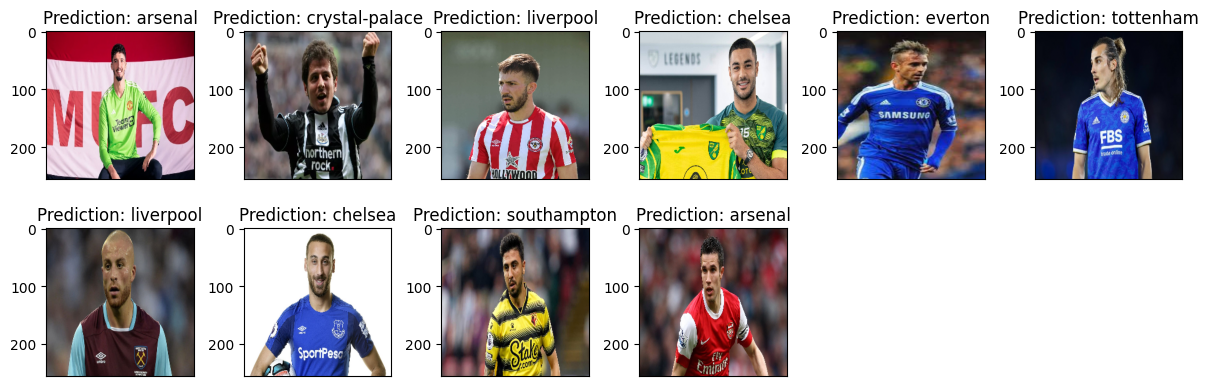

In [18]:
import os
import cv2

# Define the path to the new images
new_images_path = "./EPL-jerseys"

# Create empty lists to store new images and labels
new_images = []
new_labels = []

# Desired higher image size
new_image_size = (256, 256)  # Adjust to your preferred size

# Loop through each image in the new folder
for image_file in os.listdir(new_images_path):
    image_path = os.path.join(new_images_path, image_file)

    # Read and resize the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the desired higher size
    img = cv2.resize(img, new_image_size)

    # Append the image to the list
    new_images.append(img)
    # You might need to manually assign labels based on the folder structure or other criteria
    # new_labels.append(label)  

# Convert the new images to a numpy array
new_images = np.array(new_images)

# Normalize the new images (if needed)
new_images = new_images / 255.0  # Assuming the model was trained with normalized images

# Predict the labels for the new images
predictions_new_images = model.predict(new_images)

# Display the new images and predictions
plt.figure(figsize=(12, 12))

for i in range(len(new_images)):
    plt.subplot(6, 6, i + 1)
    
    # Disable x-axis scale
    plt.xticks([])
    # Disable y-axis scale
    plt.yticks()

    # Display the image
    plt.imshow(new_images[i])
    plt.tight_layout(pad=1.0)

    # Get the predicted label
    prediction_name = unique_class_names[np.argmax(predictions_new_images[i])]

    # Display the predicted label
    plt.title("Prediction: {}".format(prediction_name))

# Show the plot for the new images
plt.show()


Shit. Only 1 out of the 10 badges was correctly recognized by the model. Unfortunately, I wasn't that succesful. So...


I encourage you to continue and improve this project. Let's broaden the training dataset, enrich it with diverse badges, and apply data augmentation. Fine-tune the model specifically for football club logos, experiment with hyperparameter tuning, and analyze misclassifications for targeted improvements.

# 6. Deployment

In [ ]:
# Save the model
filepath = './Models'
save_model(model, filepath)

model.save("Model - 99.98% Accuracy")

I'll put the model alongside the repository files. It's an open invitation for anyone interested to leverage the model and contribute to its improvement as needed.